<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/vgg16-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path="/content/drive/MyDrive/New folder (6)/train"
test_path="/content/drive/MyDrive/New folder (6)/test"
val_path="/content/drive/MyDrive/New folder (6)/val"

In [2]:
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)
x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)
    
x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)
    

In [3]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [4]:
train_x.shape,test_x.shape,val_x.shape

((2456, 224, 224, 3), (311, 224, 224, 3), (305, 224, 224, 3))

In [5]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#train_datagen = ImageDataGenerator(rescale = 1./255,
 #                                   shear_range = 0.2,
  #                                  zoom_range = 0.2,
   #                                 horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   #validation_split = 0.
                                       #rotation_range=20,
                                #width_shift_range=0.1,
                                #height_shift_range=0.1,
                                #shear_range=0.5,
                               # zoom_range=(0.9, 1.1),
                               # horizontal_flip=False,
                                vertical_flip= True,
                                #fill_mode='constant',
                                #cval=0,
                                   )
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'sparse')

Found 2456 images belonging to 3 classes.
Found 311 images belonging to 3 classes.
Found 305 images belonging to 3 classes.


In [7]:
training_set.class_indices

{'Glioma': 0, 'Meningioma': 1, 'Pituitary tumor': 2}

In [8]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes
train_y.shape,test_y.shape,val_y.shape

((2456,), (311,), (305,))

In [9]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(3, activation='softmax')(x)

80150528/80134624 [==============================] - 0s 0us/step


In [10]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

#Early stopping to avoid overfitting of model
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=20,
  #callbacks=[early_stop],
  batch_size=128,shuffle=True)

Epoch 1/20
20/20 [==============================] - 42s 1s/step - loss: 1.1113 - accuracy: 0.5859 - val_loss: 0.6855 - val_accuracy: 0.7311
Epoch 2/20
20/20 [==============================] - 15s 756ms/step - loss: 0.4520 - accuracy: 0.8103 - val_loss: 0.5486 - val_accuracy: 0.7738
Epoch 3/20
20/20 [==============================] - 15s 759ms/step - loss: 0.3466 - accuracy: 0.8607 - val_loss: 0.4626 - val_accuracy: 0.8164
Epoch 4/20
20/20 [==============================] - 15s 767ms/step - loss: 0.3000 - accuracy: 0.8844 - val_loss: 0.4492 - val_accuracy: 0.8164
Epoch 5/20
20/20 [==============================] - 15s 776ms/step - loss: 0.2709 - accuracy: 0.8966 - val_loss: 0.4860 - val_accuracy: 0.7869
Epoch 6/20
20/20 [==============================] - 15s 777ms/step - loss: 0.2586 - accuracy: 0.9019 - val_loss: 0.4684 - val_accuracy: 0.8197
Epoch 7/20
20/20 [==============================] - 16s 785ms/step - loss: 0.2334 - accuracy: 0.9108 - val_loss: 0.4827 - val_accuracy: 0.8131
Ep

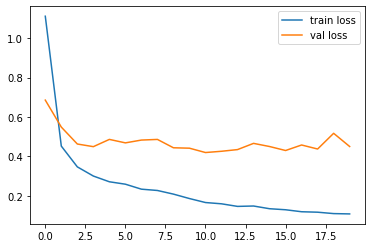

In [13]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()

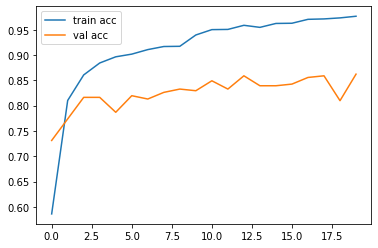

In [14]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [16]:
model.evaluate(test_x,test_y,batch_size=128)

3/3 [==============================] - 6s 2s/step - loss: 0.4608 - accuracy: 0.8328


[0.46079081296920776, 0.8327974081039429]

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
accuracy_score(y_pred,test_y)

0.8327974276527331

In [18]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       142
           1       0.64      0.66      0.65        70
           2       1.00      0.96      0.98        99

    accuracy                           0.83       311
   macro avg       0.82      0.82      0.82       311
weighted avg       0.84      0.83      0.83       311



In [19]:
confusion_matrix(y_pred,test_y)

array([[118,  24,   0],
       [ 24,  46,   0],
       [  2,   2,  95]])

In [21]:
model.save("vgg-rps-final.h5")